<a href="https://colab.research.google.com/github/Krisho1/Machine-Learning-Foundations-Math-Probability-Statistics-and-Computer-Science-Python-Codes-/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Statistics

## Segment 1: Frequentist Statistics

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [4]:
x = st.skewnorm.rvs(10, size=1000)

In [5]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

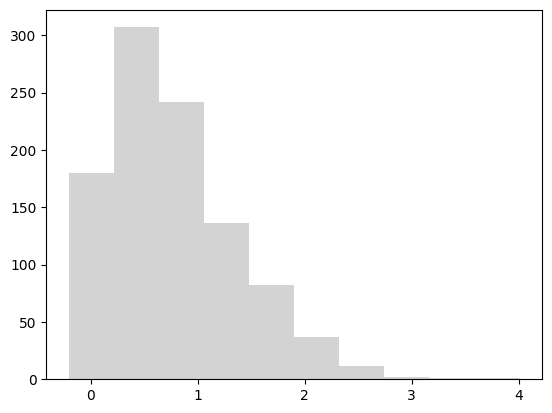

In [6]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

In [7]:
xbar = x.mean()
xbar

0.7719211854654121

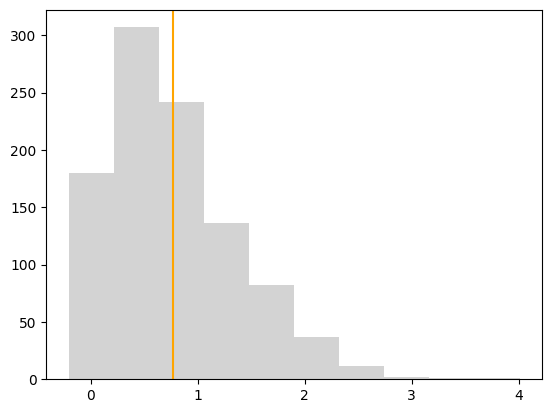

In [8]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

In [9]:
np.median(x)

0.651420257427958

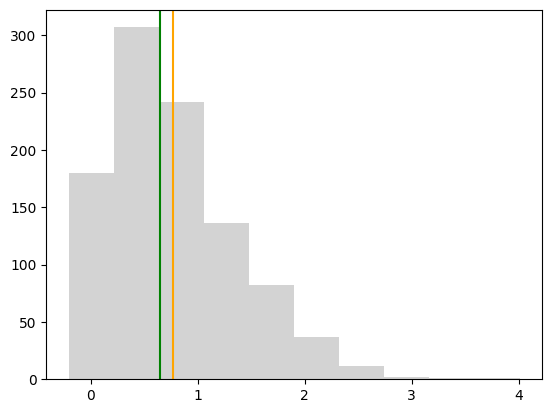

In [10]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [11]:
x.var()

0.35528419278021617

#### Standard Deviation

$$ \sigma = \sqrt{\sigma^2} $$

In [12]:
x.var()**(1/2)

0.5960572059628305

In [13]:
sigma = x.std()
sigma

0.5960572059628305

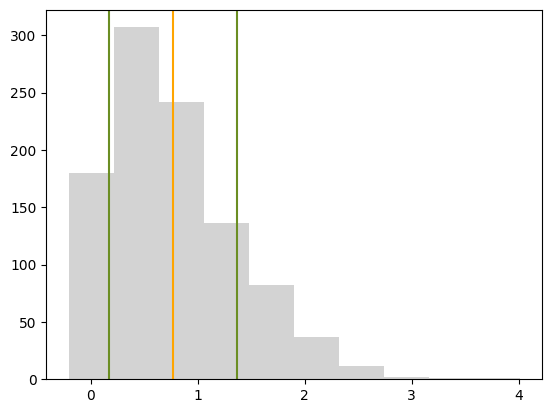

In [14]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [15]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [16]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.018858415432183823

In [17]:
st.sem(x, ddof=0)

0.018848983865986414

### Z- Score

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [33]:
x_i = 85
mu = 60
sigma =10

In [34]:
x = np.random.normal(mu,sigma,10000)

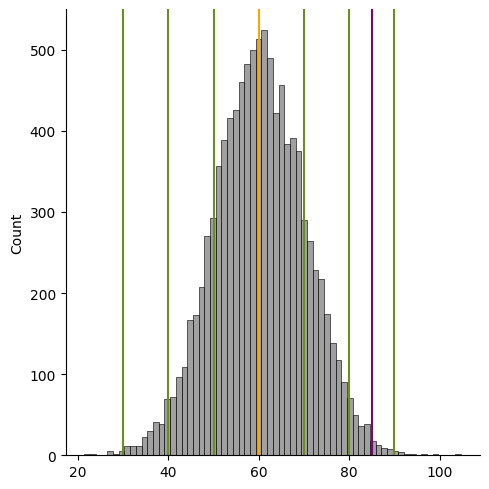

In [35]:
sns.displot(x, color='gray')
#ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean:

In [21]:
z = (x_i - mu)/sigma
z

2.0

Or using our simulated class of 10k CS101 students:

In [36]:
z = (x_i - np.mean(x))/np.std(x)
z

2.476625942263925

Less than one percent of the class outperformed you:

In [37]:
len(np.where(x > 85)[0])

54

In [38]:
100*54/10000

0.54

In [39]:
np.percentile(x, 99)

83.3617286801891

In contrast, if the mean score of your peers is 90 and the standard deviation is 2:

In [40]:
mu = 90
sigma = 2

In [41]:
y = np.random.normal(mu, sigma, 10000)

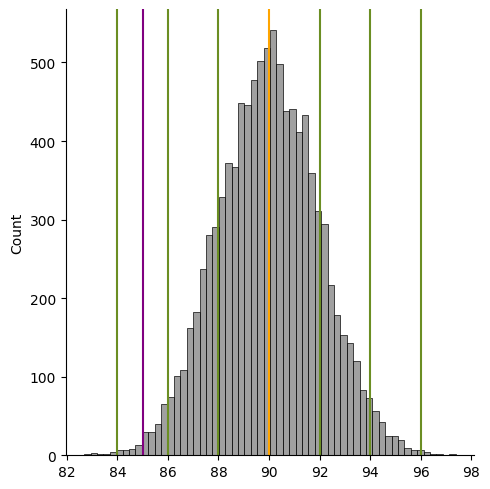

In [42]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!):

In [43]:
z = (x_i - mu)/sigma
z

-2.5

In [44]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.506180896352216

In which case, over 99% of the class outperformed you:

In [45]:
len(np.where(y > 85)[0])

9948

In [46]:
100*9948/10000

99.48

A mere 52 folks attained worse:

In [47]:
10000-9948

52

In [48]:
np.percentile(y, 1)

85.3959716097412

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time:
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [23]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [31]:
p_below*10000

62.096653257761325

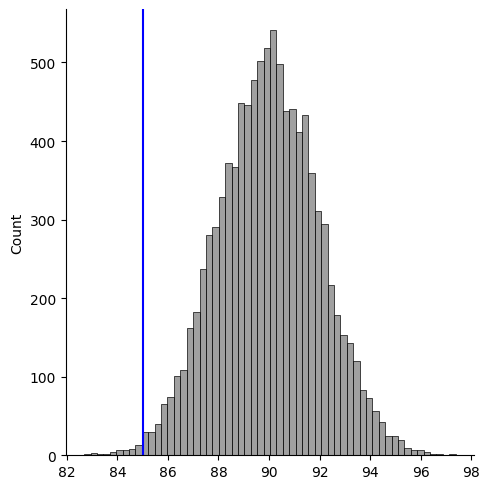

In [49]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [50]:
st.norm.cdf(2.5)

0.9937903346742238

In [51]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [52]:
p_above*10000

62.09665325776159

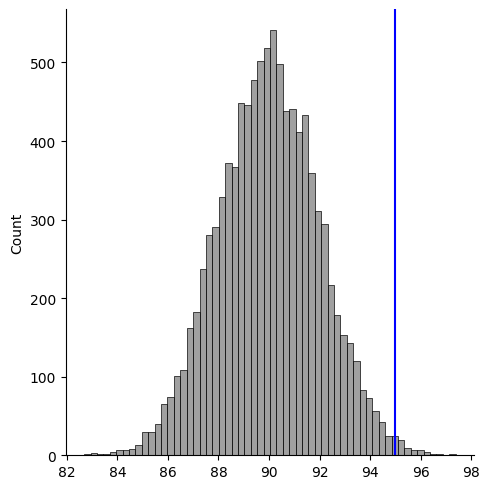

In [53]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [54]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

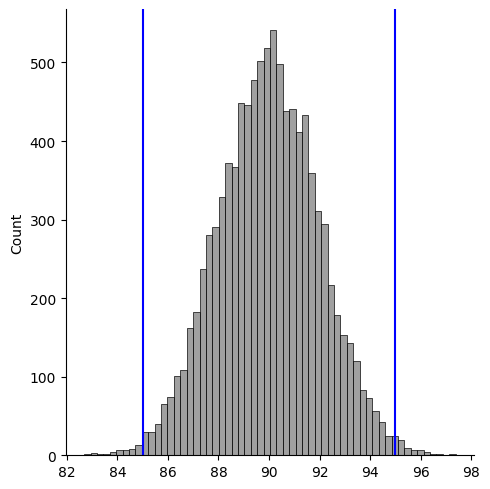

In [55]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.


If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:

In [56]:
st.norm.ppf(.025)

-1.9599639845400545

In [57]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

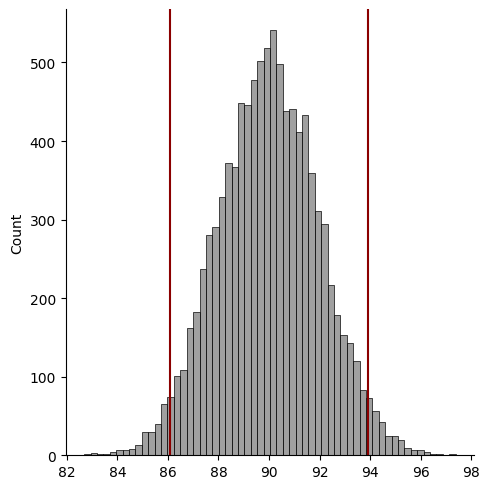

In [58]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

With a stricter threshold, say $\alpha = .01$:

In [59]:
st.norm.ppf(.005)

-2.575829303548901

In [60]:
st.norm.ppf(.995)

2.5758293035489004

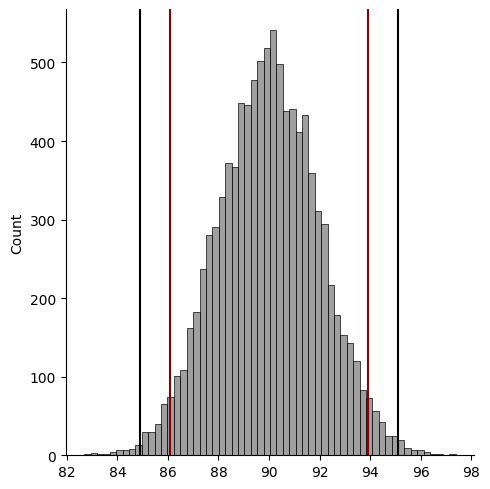

In [61]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

### Comparing Means with *t*-tests



Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Student's Single-Sample *t*-test

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

The **single-sample *t*-test** is a variation on the theme and is defined by:
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where:
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments:

In [24]:
x = [48, 50, 54, 60]

In [25]:
xbar = np.mean(x)
xbar

53.0

In [26]:
sx = st.sem(x)
sx

2.6457513110645907

In [27]:
t = (xbar -50)/sx
t

1.1338934190276817

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [28]:
def p_from_t(my_t,my_n):
    return 2*st.t.cdf(-abs(my_t),my_n -1) # 2nd arg to t.cdf() is "degrees of freedom"

In [29]:
p_from_t(t, len(x))

0.3392540508564543

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy ttest_1samp() method:

In [30]:
st.ttest_1samp(x,50)

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

#### Welch's Independent *t*-test

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an **independent *t*-test**.

In [62]:
penguins = sns.load_dataset('penguins').dropna() # some rows are missing data

In [63]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [64]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [65]:
adelie = penguins[penguins.species == 'Adelie']

In [66]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [67]:
np.unique(adelie.island, return_counts= True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [69]:
np.unique(adelie.sex , return_counts = True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

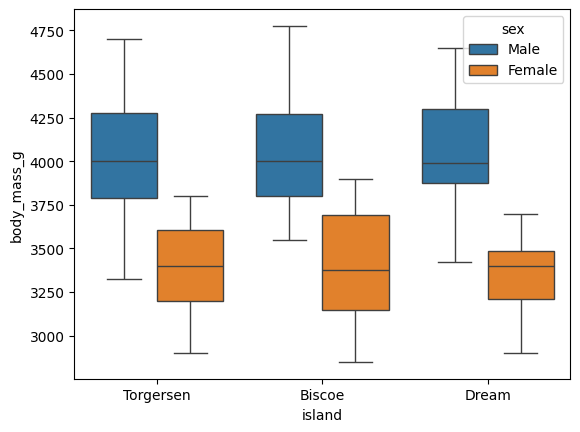

In [70]:
_ = sns.boxplot(x = 'island', y ='body_mass_g', hue = 'sex', data = adelie)

Mass doesn't appear to vary by island, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex so let's take a closer look:

In [71]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [72]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [74]:
fbar = np.mean(f)
fbar

3.368835616438356

In [75]:
mbar = np.mean(m)
mbar

4.043493150684932

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where:
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes

In [76]:
sf = f.var(ddof = 1)
sf

0.07256563926940643

In [77]:
sm = m.var(ddof = 1)
sm

0.12027825342465753

In [80]:
nf = f.size
nm = m.size

In [82]:
t = (fbar-mbar)/(sf/nf + sm/nm)**(1/2)
t

-13.126285923485879

Degrees of freedom for calculating the *p*-value are estimated using the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation), which we won't detail but is defined as:

In [83]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [84]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [85]:
p = 2*st.t.cdf(-abs(t),df) # or p_from_t(t, df+1)
p

6.402319748031518e-26

In [86]:
p_from_t(t, df+1)

6.402319748031518e-26

In [87]:
-np.log10(p)

25.193662639886046

In [88]:
st.ttest_ind(f,m, equal_var = False)

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031518e-26, df=135.69357893530386)

#### Student's Paired *t*-test

Occasionally, we have two vectors where each element in vector *x* has a corresponding element in vector *y*.

For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day (experimental condition) and a sugar pill placebo (control condition) on another day. We can then measure the patients' forgetfulness on both days to test whether the drug has a significant impact on memory.

For a given sample size, such a paired *t*-test is more powerful relative to an unpaired (independent) *t*-test because the variance of *x* is directly related to the variance in *y*: A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetful on both days. With paired samples, we capture this power by comparing the *difference* between *x* and *y*, e.g., the difference in forgetfulness for a given patient when given the drug relative to when given the sugar pill.

In contrast, consider the penguin dataset, wherein we wouldn't be able to obviously pair a given male penguin with a correponding female penguin. Or consider a situation where we provide a drug to one set of Alzheimer's patients while we provide a placebo to an entire different (an independent) group of patients. Indeed, with an independent *t*-test we could even have different sample sizes in the two groups whereas this is impossible with a paired *t*-test.

In [89]:
exercise = sns.load_dataset('exercise')

In [90]:
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [91]:
np.unique(exercise.kind , return_counts = True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

In [92]:
np.unique(exercise.diet, return_counts = True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

In [93]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


:(Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.)

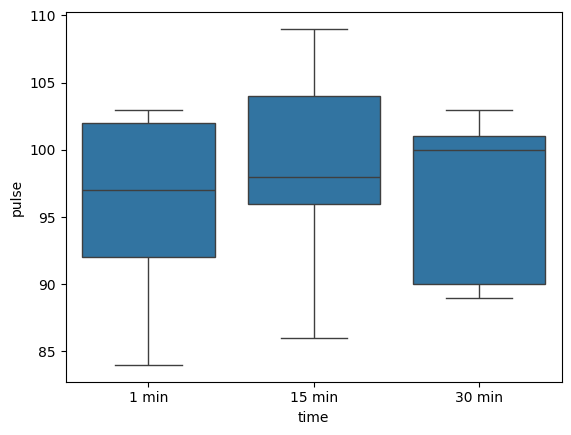

In [97]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [101]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [102]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [103]:
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [104]:
min1.mean()

95.6

In [105]:
min15.mean()

98.6

In [106]:
min30.mean()

96.6

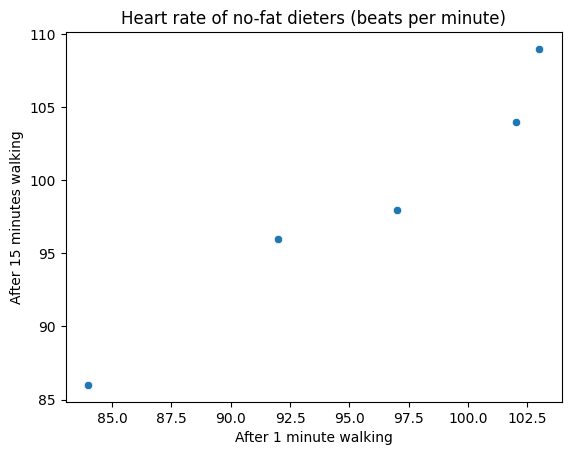

In [108]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test:
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$
Where:
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_\bar{d}$ is the standard error of the differences

In [109]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [110]:
dbar  = d.mean()
dbar

3.0

In [111]:
sd = st.sem(d)
sd

0.8944271909999159

In [112]:
t = (dbar - 0)/sd
t

3.3541019662496847

In [113]:
p_from_t(t, d.size)

0.02846020325433834

In [114]:
st.ttest_rel(min1,min15)

TtestResult(statistic=-3.3541019662496847, pvalue=0.02846020325433834, df=4)

In contrast, if we were to put the same values into an independent *t*-test...

In [115]:
st.ttest_ind(min1,min15)

TtestResult(statistic=-0.5729114862838532, pvalue=0.5824447983801297, df=8.0)

1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: [48, 50, 54, 60, 49, 55, 59, 62]. What is the t-statistic and is it significantly different from the 50L-yielding baseline process?

In [116]:
yeild = [48, 50, 54, 60, 49, 55, 59, 62]
yeild

[48, 50, 54, 60, 49, 55, 59, 62]

In [117]:
st.ttest_1samp(yeild,50)

TtestResult(statistic=2.448085108904054, pvalue=0.0442312968303811, df=7)

2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex?

In [118]:
adelie


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [119]:
np.unique(adelie.flipper_length_mm, return_counts = True)

(array([172., 174., 176., 178., 180., 181., 182., 183., 184., 185., 186.,
        187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
        198., 199., 200., 201., 202., 203., 205., 208., 210.]),
 array([ 1,  1,  1,  3,  4,  5,  3,  2,  7,  8,  6, 10,  5,  6, 18, 10,  5,
         9,  3, 11,  6,  5,  4,  4,  2,  1,  2,  1,  1,  1,  1]))

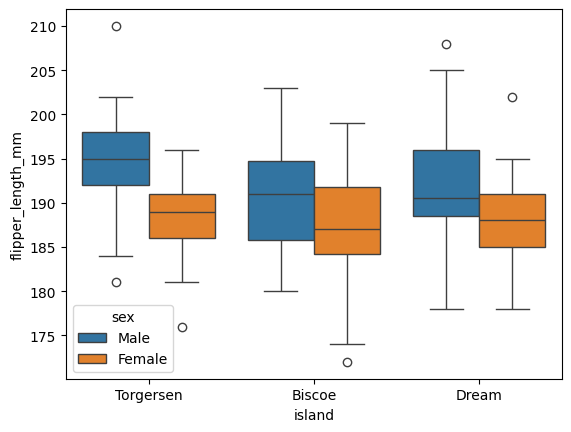

In [124]:
_ = sns.boxplot(x = 'island', y = 'flipper_length_mm', hue = 'sex', data  = adelie)

In [126]:
flipm = adelie[(adelie.island == 'Dream') & (adelie.sex == 'Male')]['flipper_length_mm'].to_numpy()
flipm

array([178., 184., 196., 190., 184., 195., 196., 190., 182., 191., 194.,
       190., 189., 205., 186., 208., 196., 192., 199., 190., 200., 193.,
       187., 190., 185., 190., 193., 201.])

In [127]:
flipf = adelie[(adelie.island == 'Dream') & (adelie.sex == 'Female')]['flipper_length_mm'].to_numpy()
flipf

array([178., 188., 195., 180., 181., 182., 186., 185., 190., 191., 189.,
       190., 202., 185., 187., 190., 178., 193., 187., 191., 185., 193.,
       188., 192., 184., 195., 187.])

In [137]:
st.ttest_ind(flipf,flipm, equal_var = False)

TtestResult(statistic=-2.446038619999187, pvalue=0.017898599613024185, df=51.48552818449215)

3. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?

In [129]:
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [131]:
lowfat = exercise[(exercise.diet == 'low fat') & (exercise.kind == 'rest')]
lowfat

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


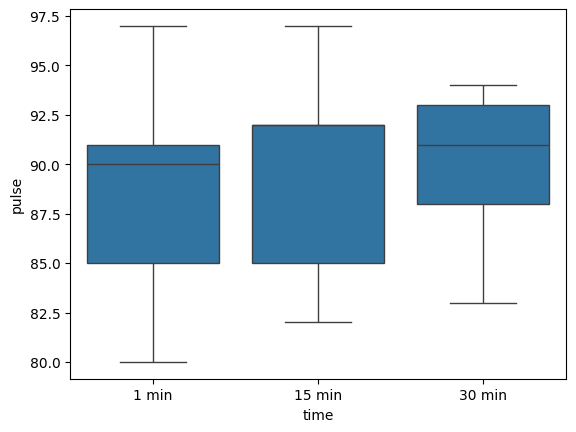

In [132]:
_ = sns.boxplot(x = 'time', y = 'pulse', data = lowfat)

In [133]:
lmin1  = lowfat[(lowfat.time == '1 min')]['pulse'].to_numpy()
lmin1

array([85, 90, 97, 80, 91])

In [134]:
lmin15 = lowfat[(lowfat.time == '15 min')]['pulse'].to_numpy()
lmin15

array([85, 92, 97, 82, 92])

In [136]:
st.ttest_rel(lmin1,lmin15)

TtestResult(statistic=-2.23606797749979, pvalue=0.08900934250008564, df=4)